<a href="https://colab.research.google.com/github/conquerv0/Pynaissance/blob/master/4.%20Fundamentals/Option_Pricing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Option Pricing With Black Scholes Model and Various Exploration
Author: Victor Xiao

In [ ]:
#Upload necessary packages
import pandas as pd
from py_vollib.black_scholes  import black_scholes as bs
from py_vollib.black_scholes.implied_volatility import implied_volatility as iv
import numpy
from datetime import date

### 1. Data Cleaning and Exploration
First, we need to set up the dataframe by reading the option data from excel. 

In [ ]:
# Company is amazon. Set the current stock price and risk-free rate r
stock=3206.22
r=0
# Calculate T
delta = date(2021, 12, 17) - date(2021, 6, 4)
t=delta.days/365

# Read the "Data" spreadsheet from the "Tutorial 3" excel file and upload it to the dataset "option_data"
option_data=pd.read_excel('Assignment2_Data.xlsx', sheet_name='Data')
option_data=option_data.drop(['Stock Price', 'r'], axis=1)
option_data.head()

# option_data["ImpVol"] = numpy.nan

,Strike,Bid,Ask,Last Price,Implied Volatility,Open Interest,average price,Intrinsic value,Time Values
0,1480,1921.70,1939.0,1585.00,1.1887,0,1930.350,1750.11,188.89
1,1500,1727.70,1742.5,2000.80,0.5646,2,1735.100,1730.11,12.39
2,1540,1688.15,1703.0,1757.00,0.5510,1,1695.575,1690.11,12.89
3,1640,1613.95,1628.8,1564.85,0.6453,0,1621.375,1590.11,38.69
4,1780,1452.30,1467.0,1440.40,0.5184,4,1459.650,1450.11,16.89


<AxesSubplot:xlabel='Strike'>

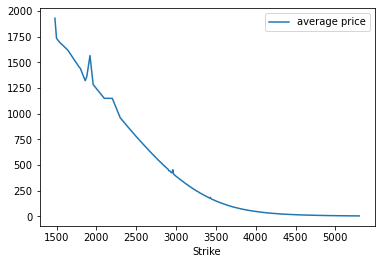

In [ ]:
#Calculate the average call price
option_data["average price"]=(option_data["Bid"]+option_data["Ask"])/2

#Plot the relation between strike prices and the call prices
option_data.plot(x="Strike", y="average price")

### 2-1. In-the-money call
For this example, we select an equity option that is in the money. 

In [ ]:
itm_call=option_data[option_data["Strike"]==2880]
itm_call

,Strike,Bid,Ask,Last Price,Implied Volatility,Open Interest,average price,Intrinsic value,Time Values,average price
25,2880,467.25,478.1,735.5,0.3037,10,472.675,350.11,127.99,472.675


a. The underlying stock goes up 1%. 

In [ ]:
"""
The parameters for py_vollib.black_scholes. 
price = black_scholes(flag, S, K, t, r, sigma)
iv = implied_volatility(price, S, K, t, r, flag)
"""
price_partA=bs('c',stock*1.01,itm_call.iloc[0,0],t,r,itm_call['Implied Volatility'])
print("New call price=", price_partA, " Dollar Return=",price_partA-itm_call.iloc[0,6]," % Return=",(price_partA-itm_call.iloc[0,6])/itm_call.iloc[0,6])

New call price= 486.75381728122727  Dollar Return= 14.07881728122726  % Return= 0.02978540705818429


b. The implied volatility of the stock goes up by 1%

In [ ]:
price_partB=bs('c',stock,itm_call.iloc[0,0],t,r,itm_call['Implied Volatility']+0.01)
print("New call price=", price_partB, " Dollar Return=",price_partB-itm_call.iloc[0,6]," % Return=",(price_partB-itm_call.iloc[0,6])/itm_call.iloc[0,6])

New call price= 471.20457070585303  Dollar Return= -1.4704292941469816  % Return= -0.003110867497005303


c. Interest rate goes up by 1%

In [ ]:
price_partC=bs('c',stock,itm_call.iloc[0,0],t,r+0.01,itm_call['Implied Volatility'])
print("New call price=", price_partC, " Dollar Return=",price_partC-itm_call.iloc[0,6]," % Return=",(price_partC-itm_call.iloc[0,6])/itm_call.iloc[0,6])

New call price= 473.3288517057745  Dollar Return= 0.6538517057745139  % Return= 0.00138330080028458


d. One month eplased, with no change

In [ ]:
#Part D
delta_new=date(2021, 12, 17) - date(2021, 7, 4)
t_new=delta_new.days/365
price_partD=bs('c',stock,itm_call.iloc[0,0],t_new,r,itm_call['Implied Volatility'])
print("New call price=", price_partD, " Dollar Return=",price_partD-itm_call.iloc[0,6]," % Return=",(price_partD-itm_call.iloc[0,6])/itm_call.iloc[0,6])

New call price= 444.47187119408056  Dollar Return= -28.203128805919448  % Return= -0.05966706258194203


### 2.3 Out-of-the-money Call
For this example, we select an equity option that is out of the money. 

In [ ]:
itm_put=option_data[option_data["Strike"]==3600]
itm_put

,Strike,Bid,Ask,Last Price,Implied Volatility,Open Interest,average price,Intrinsic value,Time Values,average price
89,3600,118.0,123.95,127.79,0.2705,314,120.975,0.0,123.95,120.975


a. The underlying stock goes up 1%. 

In [ ]:
price_partA=bs('c',stock*1.01,itm_put.iloc[0,0],t,r,itm_put['Implied Volatility'])
print("New put price=", price_partA, " Dollar Return=",price_partA-itm_put.iloc[0,6]," % Return=",(price_partA-itm_put.iloc[0,6])/itm_put.iloc[0,6])

New put price= 126.53997490241304  Dollar Return= 5.5649749024130415  % Return= 0.0460010324646666


b. The implied volatility of the stock goes up by 1%

In [ ]:
price_partB=bs('c',stock,itm_put.iloc[0,0],t,r,itm_put['Implied Volatility']+0.01)
print("New put price=", price_partB, " Dollar Return=",price_partB-itm_put.iloc[0,6]," % Return=",(price_partB-itm_put.iloc[0,6])/itm_put.iloc[0,6])

New put price= 124.57414858700557  Dollar Return= 3.5991485870055726  % Return= 0.029751176581984482


c. Interest rate goes up by 1%

In [ ]:
price_partC=bs('c',stock,itm_put.iloc[0,0],t,r+0.01,itm_put['Implied Volatility'])
print("New put price=", price_partC, " Dollar Return=",price_partC-itm_put.iloc[0,6]," % Return=",(price_partC-itm_put.iloc[0,6])/itm_put.iloc[0,6])

New put price= 121.04056361286852  Dollar Return= 0.06556361286853019  % Return= 0.0005419600154455894


d. One month eplased, with no change

In [ ]:
#Part D
delta_new=date(2021, 12, 17) - date(2021, 7, 4)
t_new=delta_new.days/365
price_partD=bs('c',stock,itm_put.iloc[0,0],t_new,r,itm_put['Implied Volatility'])
print("New put price=", price_partD, " Dollar Return=",price_partD-itm_put.iloc[0,6]," % Return=",(price_partD-itm_put.iloc[0,6])/itm_put.iloc[0,6])

New put price= 98.48491764359014  Dollar Return= -22.490082356409857  % Return= -0.18590685973473742
